# Perceptron

In the modern sense, the perceptron is an algorithm for learning a binary classifier called a [[Linear classifier#Definition|threshold function]]: a function that maps its input <math>\mathbf{x}</math> (a real-valued [[Vector space|vector]]) to an output value <math>f(\mathbf{x})</math> (a single [[Binary function|binary]] value):

$$
f(\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b > 0,\\0 & \text{otherwise}\end{cases}
$$

where $\mathbf{w}$ is a vector of real-valued weights, $\mathbf{w} \cdot \mathbf{x}$ is the dot product $\sum_{i=1}^m w_i x_i$, where *m* is the number of inputs to the perceptron, and *b* is the ''bias''. The bias shifts the decision boundary away from the origin and does not depend on any input value.

In [13]:
import itertools
import functools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(1234)
%matplotlib inline

**Helper Functions**

In [17]:
def combinations(x, degree):
    return itertools.combinations_with_replacement(x, degree)

def compute_new_features(items):
    return functools.reduce(lambda x, y: x * y, items)

def polynomial_transform(x, degree):
    if x.ndim == 1:
        x = x[:, None]

    features = [np.ones(len(x))] # A list of np-arrays with all 1.

    for degree in range(1, degree + 1):
        for item in combinations(x.T, degree):
            features.append(compute_new_features(item))
            
    return np.asarray(features).T

def create_toy_data(factor=3):
    x0 = np.random.normal(size=50).reshape(-1, 2) - factor
    x1 = np.random.normal(size=50).reshape(-1, 2) + factor
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25)-1, np.ones(25)]).astype(np.int)

sns.set_context(context='notebook',font_scale=1.5,rc={"lines.linewidth":2.5})

def visualize_model(X_train, labels, lsc, degree=1):
    f = plt.figure(figsize=(8,8))

    x1_min = np.min(x_train[:,1])
    x1_max = np.max(x_train[:,1])
    x2_min = np.min(x_train[:,2])
    x2_max = np.max(x_train[:,2])
    
    x1_test, x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100)) 
    x_test = np.array([x1_test, x2_test]).reshape(2,-1).T
    x_test_poly = polynomial_transform(x_test, degree=degree)
    y_test = lsc.predict(x_test_poly)
    
    sns.scatterplot(data=x_train, x=x_train[:,-2], y=x_train[:,-1], hue=labels)
    plt.contourf(x1_test, x2_test, y_test.reshape(100,100), alpha=0.5, levels=np.linspace(0,1,3))
    plt.gca().set_aspect('equal', adjustable='box')

## Perceptron Class - `Perceptron()`

In [19]:
class Perceptron(object):
    def __init__(self):
        pass
    
    def predict(self,X):
        z = X @ self.w
        return np.where (z >= 0, 1, -1)
 
    def loss(self,X,y,reg_rate):
        return np.sum(np.maximum(-1 * self.predict(X) * y, np.zeros(y.shape[0])))

    def fit(self,X, y, reg_rate=0):
        self.w = np.linalg.solve(X.T @ X + reg_rate * np.eye(X.shape[-1]), X.T@y)
        print(X.shape, y.shape, self.w.shape)
        return self.w
  
    def train(self, X, y, num_epochs, lr=0.001):
        self.w = np.zeros(X.shape[1])
        self.w_all = []
        self.err_all = []
        for i in np.arange(0, num_epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w += lr * (target - self.predict(xi)) * xi
                errors += np.maximum(-1 * self.predict(xi) * y, np.zeros(y.shape[0]))
            self.err_all.append(errors)
            self.w_all.append(self.w)
        return self.w

### Linearly Separable Case

In [20]:
x, y = create_toy_data()
x_poly = polynomial_transform(x, degree=1)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y)

C:\Users\Vishvam\AppData\Local\Temp/ipykernel_14888/885939937.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.concatenate([x0, x1]), np.concatenate([np.zeros(25)-1, np.ones(25)]).astype(np.int)


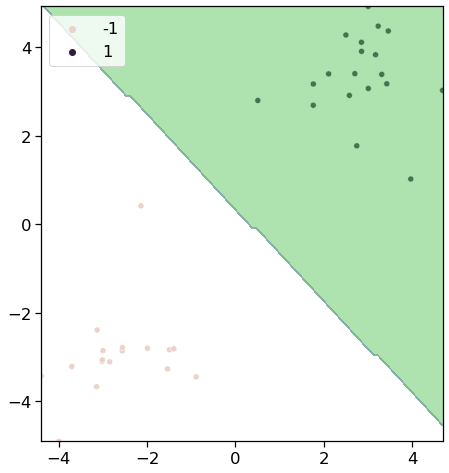

In [23]:
p = Perceptron()
p.train(x_train, y_train, num_epochs=100, lr=1)
visualize_model(x_train, y_train, p, degree=1)

### Non-Linearly Separable Case
In non-linear separable case, the classification doesn't converge, but oscillate.  Print loss to see.

In [26]:
x, y = create_toy_data(factor=0.5)
x_poly = polynomial_transform(x, degree=1)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y)

C:\Users\Vishvam\AppData\Local\Temp/ipykernel_14888/885939937.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.concatenate([x0, x1]), np.concatenate([np.zeros(25)-1, np.ones(25)]).astype(np.int)


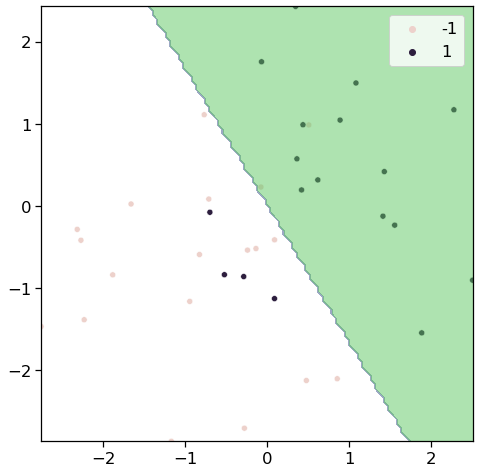

In [27]:
p = Perceptron()
p.train(x_train, y_train, num_epochs=100, lr=1)
visualize_model(x_train, y_train, p, degree=1)

The default behaviour of `np.maximum()` is to take two arrays and **compute their element-wise maximum**. Here, 'compatible' means that one array can be broadcast to the other. For example

In [3]:
b = np.array([3, 6, 1])
c = np.array([4, 2, 9])
np.maximum(b, c)

array([4, 6, 9])

But np.maximum is also a universal function which means that it has other features and methods which come in useful when working with multidimensional arrays. For example you can compute the cumulative maximum over an array (or a particular axis of the array):

In [6]:
d = np.array([2, 1, 3, -4, -2, 7, 9])
print(np.maximum.accumulate(d))
print(np.multiply.accumulate(d))

[2 2 3 3 3 7 9]
[   2    2    6  -24   48  336 3024]
